![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [89]:
# Start your code here!
import pandas as pd
import numpy as np

mens_goals = pd.read_csv('men_results.csv')
mens_goals.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [90]:
mens_goals.tournament.value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [91]:
womens_goals = pd.read_csv('women_results.csv')
womens_goals.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


In [92]:
def filter_data(data, col, value):
    
    data['date'] = pd.to_datetime(data['date'])
    data = data.loc[data['date'] > '2002-01-01']
    data = data[data[col].isin([value])]
    data['total_goals'] = data['home_score'] + data['away_score']
    return data

mens_goals_filtered = filter_data(mens_goals, 'tournament', 'FIFA World Cup')
womens_goals_filtered = filter_data(womens_goals, 'tournament', 'FIFA World Cup')
mens_goals_filtered.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_goals
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


## Checking sample statistics

In [93]:
print("Men's International Goals mean : ",mens_goals_filtered['total_goals'].mean())

print("\nWomen's International Goals mean : ",womens_goals_filtered['total_goals'].mean())

print("\nMen's International Goals standard deviation : ",mens_goals_filtered['total_goals'].std())

print("\nWomen's International Goals standard deviation : ",womens_goals_filtered['total_goals'].std())

print("\nMen's International Goals #matches : ",mens_goals_filtered['total_goals'].count())

print("\nWomen's International Goals #matches : ",womens_goals_filtered['total_goals'].count())

Men's International Goals mean :  2.5130208333333335

Women's International Goals mean :  2.98

Men's International Goals standard deviation :  1.6525436488378111

Women's International Goals standard deviation :  2.022387265401036

Men's International Goals #matches :  384

Women's International Goals #matches :  200


## Checking whether sample is normally distributed - Men's Sample

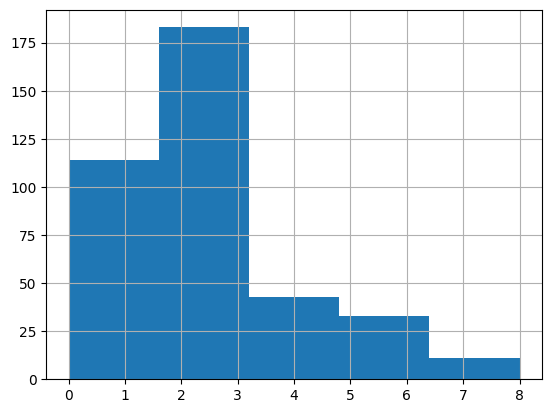

In [94]:
import matplotlib.pyplot as plt
mens_goals_filtered['total_goals'].hist(bins = 5)
plt.show()

In [95]:
from scipy.stats import shapiro

w, p = shapiro(mens_goals_filtered['total_goals'])

print(w, p)

# The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. 
# If the p-value is less than 0.05, then we can reject the null hypothesis and conclude that the data is not normally distributed.

if (p<=0.05):
    print("\nReject Null Hyp. => Data is not normal")
else:
    print("\nFail to reject Null Hyp. => Data is normal")

0.9266489744186401 8.894154401688226e-13

Reject Null Hyp. => Data is not normal


## Checking whether sample is normally distributed - Women's Sample

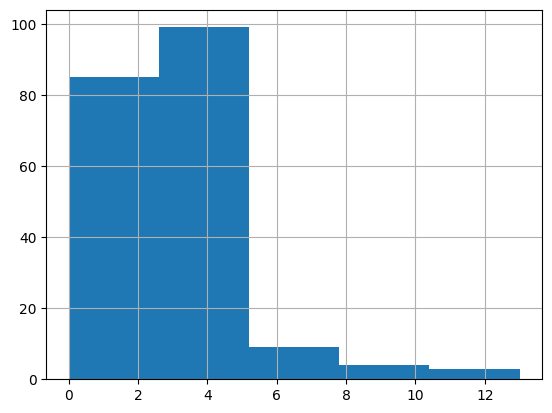

In [96]:
import matplotlib.pyplot as plt
womens_goals_filtered['total_goals'].hist(bins = 5)
plt.show()

In [97]:
from scipy.stats import shapiro

w, p = shapiro(womens_goals_filtered['total_goals'])

print(w, p)

# The null hypothesis for the Shapiro-Wilk test is that the data is normally distributed. 
# If the p-value is less than 0.05, then we can reject the null hypothesis and conclude that the data is not normally distributed.

if (p<=0.05):
    print("\nReject Null Hyp. => Data is not normal")
else:
    print("\nFail to reject Null Hyp. => Data is normal")

0.8491013050079346 3.8905201759850683e-13

Reject Null Hyp. => Data is not normal


$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

- $H_{O} : \mu_{women} = \mu_{men}$

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

- $H_{A} : \mu_{women} > \mu_{men}$ 

In [105]:
mens_goals_filtered['gender'] = 'men'
womens_goals_filtered['gender'] = 'women'

combined = pd.concat([mens_goals_filtered[['gender','total_goals']],womens_goals_filtered[['gender','total_goals']]])

combined_wide = combined.pivot(columns='gender',values='total_goals')

alpha = 0.1

mwu_test = pingouin.mwu(x = combined_wide['women'],
                        y = combined_wide['men'],
                        alternative = 'greater')

p_val = mwu_test['p-val'][0]

print("p-value",p_val)

# Determine hypothesis test result using sig. level
if (p_val <= alpha):
    print("Reject Null Hyp.")
    result = "reject"
else:
    print("Fail to reject Null Hyp.")
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}

p-value 0.005106609825443641
Reject Null Hyp.


## Hypothesis Test - t-test using pingouin

In [106]:
import pingouin

alpha = 0.1

ttest = pingouin.ttest(x=womens_goals_filtered['total_goals']
               ,y=mens_goals_filtered['total_goals'],paired = False
               ,alternative="greater")

p_value = ttest['p-val'][0]
t_stat = ttest['T'][0]
print("alpha-value : ",alpha)

print("\nt-statistic : ",t_stat)

print("\np-value : ",p_value)

if p_value <= alpha:
    print("\nReject Null Hyp.")
    print("\nThe mean number of goals scored in women's international soccer matches is greater than men's.")
    result = 'reject'
else:
    print("\nFail to reject Null Hyp.")
    print("\nThe mean number of goals scored in women's international soccer matches is the same as men's.")
    result = 'fail to reject'

alpha-value :  0.1

t-statistic :  2.812822759620731

p-value :  0.0025980724004871503

Reject Null Hyp.

The mean number of goals scored in women's international soccer matches is greater than men's.


## Hypothesis Test - t-test using scipy

In [107]:
# Choose Significance Level
alpha = 0.1
print("Significance Level : ",alpha)

# Getting mean of sub-groups
xbar_men = mens_goals_filtered['total_goals'].mean()
xbar_women = womens_goals_filtered['total_goals'].mean()

# Getting standard deviation of sub-groups
s_men = mens_goals_filtered['total_goals'].std()
s_women = womens_goals_filtered['total_goals'].std()

# Getting size of sub-groups
n_men = mens_goals_filtered['total_goals'].count()
n_women = womens_goals_filtered['total_goals'].count()

# Calculate the numerator of the test statistic
numerator = (xbar_women - xbar_men)

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_women**2)/n_women + (s_men**2)/n_men)

# Calculate the test statistic
t_stat = numerator/denominator

# Print the test statistic
print("t-Statistic Value : ",t_stat)

# Calculate the degrees of freedom
degrees_of_freedom = n_women + n_men - 2

print("Degrees of Freedom : ",degrees_of_freedom)

# Calculating p-values
from scipy.stats import t
p_value = (1-t.cdf(t_stat, df = degrees_of_freedom))

print("p-Value : ",p_value)

print("\n** Hypothesis Test Results **")

if p_value <= alpha:
    print("\nReject Null Hyp.")
    print("\nThe mean number of goals scored in women's international soccer matches is greater than men's.")
    result = 'reject'
else:
    print("\nFail to reject Null Hyp.")
    print("\nThe mean number of goals scored in women's international soccer matches is the same as men's.")
    results = 'fail to reject'

Significance Level :  0.1
t-Statistic Value :  2.812822759620731
Degrees of Freedom :  582
p-Value :  0.0025383186141713088

** Hypothesis Test Results **

Reject Null Hyp.

The mean number of goals scored in women's international soccer matches is greater than men's.
